In [1]:
import lmfit as lm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import Parameters, Minimizer
from get_data import get_weather_data, get_dengue_data, plot_data
from edo_model_yang import C0, A0, R_m
from edo_model_yang import sup_cap_yang, system_odes, solve_model,get_temp, solve_fit, plot_fit

def solve_model_2(t, y0, param_fit, param_fixed, temp, cap, fixed):
    '''
    Função que computa a solução numérica do sistema de equações. 
    
    :params t: array. Intervalo de tempo que deverá ser computado.
    :params y0: list or array. Deve conter os valores das condições iniciais do modelo. 
    :params param_fit: tuple. parâmetros que serão fitados. 
    :params param_fixed: tuple. parâmetros que serão fixados. 
    :params temp: array. Array com os valores de temperatura. O tamanho desse array deve ser 
                        condizente com o intervalo de tempo que o modelo será integrado. 
    :params cap: float or array. Parametro que irá determinar a cap suporte do modelo. 
    :params fixed: boolean. Se True serão usados os parâmetros ontomológicos fixos. 
    '''

    
    sol = odeint(system_odes_old, y0, t, args=(param_fit, param_fixed, temp, cap, False))
    
    
    return sol


In [2]:
t = np.arange(0, 150)

y0 = [129708.57200000001, 512176, 0, 0, 256073, 0, 15, 0]

#start_date = '2010-01-02'
b = 0.5078191837232657
beta = 0.5300105880173681

# parâmetros fixos 
MU_H = 1/(365*67)    #human mortality rate - day^-1
ALPHA_H = 0.1 #recovering rate - day^-1
THETA_H = 0.027   #intrinsic incubation rate - day^-1
K = 0.5          #fraction of female mosquitoes hatched from all egs
C_A = 0.0      #control effort rate on aquatic phase
C_M = 0.0    #control effort rate on terretrial phase
D = 4

par_fit = b, beta

par_fixed = MU_H, THETA_H, ALPHA_H, K, C_A, C_M, D

df_we = get_weather_data()

T1 = get_temp(start_date = '2010-01-08', end_date = '2010-07-01')

C_1 =  sup_cap_yang(df_we.loc[(df_we.index >= '2010-01-01') & (df_we.index <= '2010-07-01')], w1 = 0.48205696785581553)

In [5]:

r  = solve_model(t, y0, par_fit, par_fixed, T1, C_1, fixed = False)

r.y[0].shape

(41,)

In [6]:
r

  message: 'Required step size is less than spacing between numbers.'
     nfev: 54458
     njev: 0
      nlu: 0
      sol: None
   status: -1
  success: False
        t: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])
 t_events: None
        y: array([[1.29708572e+05, 9.99539846e+02, 1.00324235e+03, 1.33827266e+03,
        1.41980110e+03, 2.84295853e+04, 1.01845060e+04, 1.75533887e+03,
        1.29330065e+04, 1.71740031e+03, 3.26953110e+04, 7.47065153e+03,
        1.60875330e+04, 2.82854458e+04, 3.75908847e+03, 1.12828183e+03,
        1.00513309e+03, 1.00467265e+03, 9.98833760e+02, 1.20976486e+03,
        3.50935349e+04, 4.86559006e+03, 1.18694201e+03, 1.00662904e+03,
        9.99885585e+02, 1.00183236e+03, 9.99220540e+02, 1.00450176e+03,
        1.12504652e+04, 1.44927418e+03, 3.53606791e+03, 1.08800984e+03,
        3.29089138e+04, 3.68936393e+03, 


from scipy.integrate import odeint
t = np.arange(0, 150)
r = solve_model_2(t, y0, par_fit, par_fixed, T1, C_1, fixed = False)


In [6]:
 r[:, 0].shape

(150,)

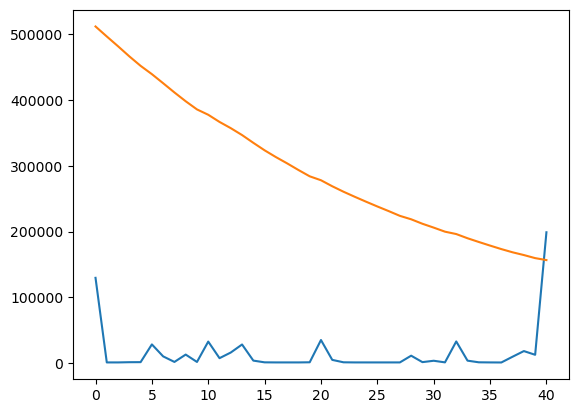

In [26]:
plt.plot(r.y[0])
plt.plot(r.y[1])

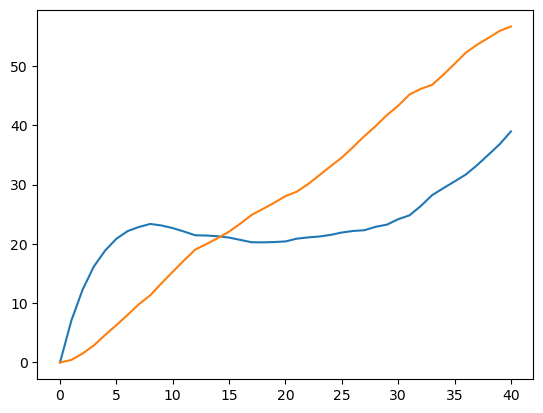

In [27]:
plt.plot(r.y[2])
plt.plot(r.y[3])

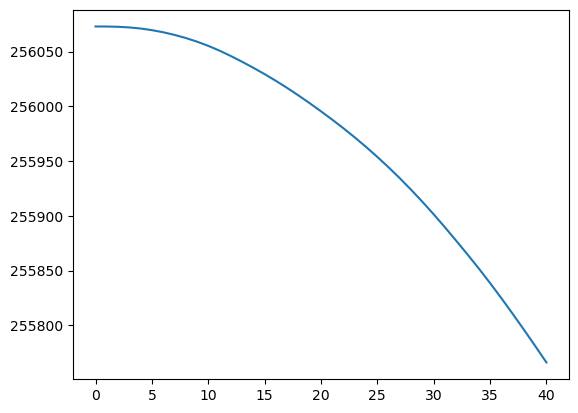

In [28]:
plt.plot(r.y[4])

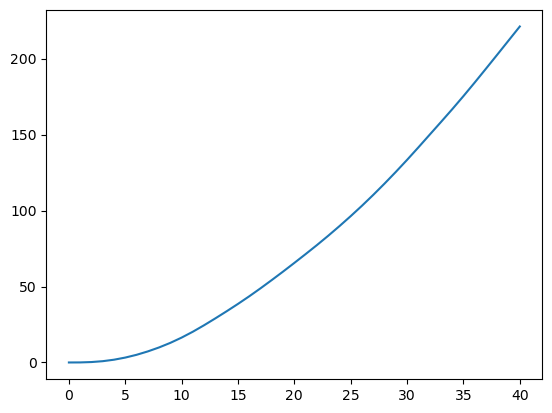

In [29]:
plt.plot(r.y[5])

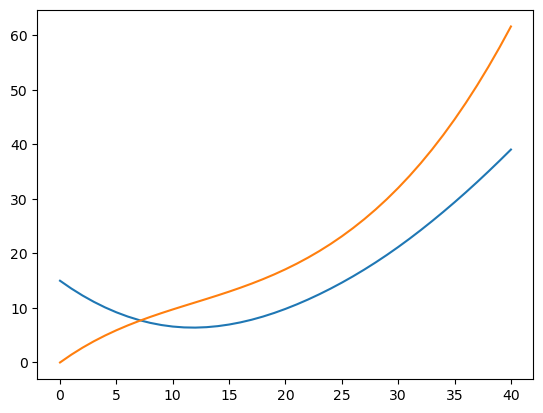

In [30]:
plt.plot(r.y[6])
plt.plot(r.y[7])

In [31]:
print(T1)

[28.  27.6 26.1 26.8 25.1 25.  25.2 23.7 26.5 26.6 27.  27.2 23.2 23.7
 24.4 26.1 27.  25.1 25.4 25.9 24.2 26.6 27.9 28.  27.9 29.4 30.6 29.2
 30.6 28.5 30.  25.6 24.1 27.3 27.5 27.4 25.5 24.6 24.4 22.8 25.4 27.5
 28.5 28.8 27.9 26.5 28.  23.5 23.5 24.8 22.3 24.5 26.1 25.7 25.9 26.4
 25.8 24.4 24.  24.1 25.7 26.9 25.5 26.2 25.4 25.4 24.9 25.8 26.8 27.1
 27.8 25.  24.9 23.3 22.8 22.4 24.4 25.1 24.9 24.9 25.4 25.2 25.7 26.7
 26.  25.5 23.4 19.  19.1 18.9 19.5 19.6 20.2 20.9 21.6 23.2 23.4 21.5
 22.7 25.3 26.5 25.5 26.4 24.6 23.5 18.7 17.8 22.3 20.2 18.1 19.5 20.
 19.4 19.6 21.7 22.1 18.6 18.8 22.  20.2 16.3 13.6 14.2 13.  13.  15.9
 19.2 20.5 18.  19.1 12.8 13.7 15.2 16.7 19.9 21.4 20.1 17.1 17.4 18.5
 18.4 20.3 17.4 13.5 13.  16.2 17.8 17.6 14.4 11.8 13.2 16.3 16.  17.4
 17.7 18.2 18.  18.8 20.8 22.8 22.5 22.1 24.2 18.6 13.6 14.3 17.5 21.3
 22.7 22.4 21.9 18.7 17.8 20.1 21. ]


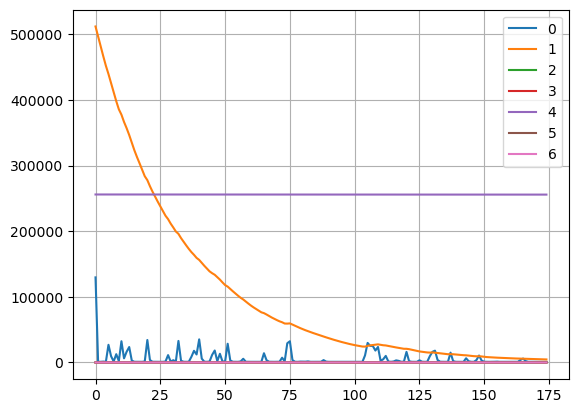

In [16]:
plt.figure()
for i in np.arange(0,7):
    plt.plot(r.y[i], label = f'{i}')

plt.grid()
plt.legend()
plt.show()


In [35]:
r.y[0].shape

(41,)

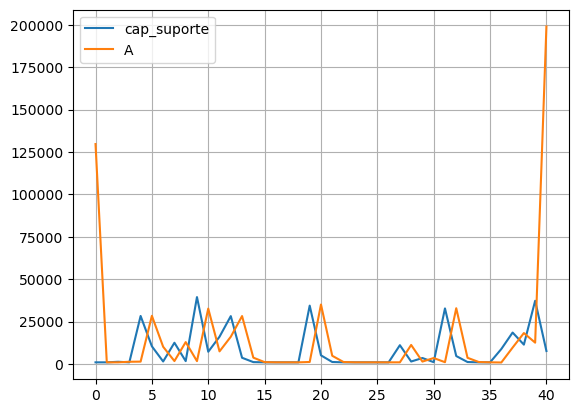

In [36]:
plt.figure()

plt.plot(C_1.values[:41]*10**4, label = 'cap_suporte')
plt.plot(r.y[0], label = 'A')

plt.grid()
plt.legend()
plt.show()

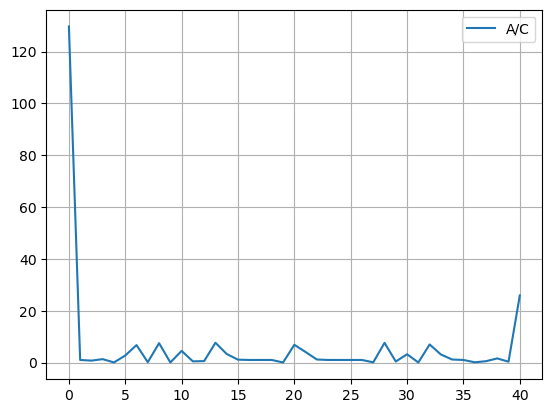

In [38]:
plt.figure()

plt.plot(r.y[0]/(C_1.values[:41]*10**4), label = 'A/C')


plt.grid()
plt.legend()
plt.show()

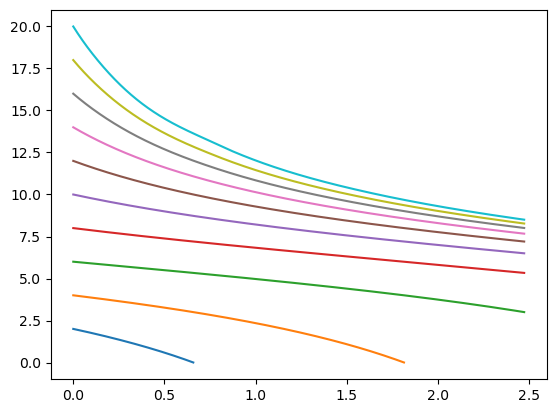

In [7]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optim

def dudt(t, u):
    return u*(1-u/12)-4*np.heaviside(-(t-5), 1)

ic = [2,4,6,8,10,12,14,16,18,20]

sol = solve_ivp(dudt, (0, 10), ic, t_eval=np.linspace(0, 10, 10000))

for solution in sol.y:
    y = [y for y in solution if y >= 0]
    t = sol.t[:len(y)]
    plt.plot(t, y)

In [8]:
sol

  message: 'Required step size is less than spacing between numbers.'
     nfev: 602
     njev: 0
      nlu: 0
      sol: None
   status: -1
  success: False
        t: array([0.00000000e+00, 1.00010001e-03, 2.00020002e-03, ...,
       2.47024702e+00, 2.47124712e+00, 2.47224722e+00])
 t_events: None
        y: array([[ 2.00000000e+00,  1.99766566e+00,  1.99532975e+00, ...,
        -5.93746014e+03, -1.17597168e+04, -6.32449671e+05],
       [ 4.00000000e+00,  3.99866631e+00,  3.99733218e+00, ...,
        -3.97978118e+00, -3.98908952e+00, -3.99841337e+00],
       [ 6.00000000e+00,  5.99899990e+00,  5.99799980e+00, ...,
         3.00378982e+00,  3.00204111e+00,  3.00029152e+00],
       ...,
       [ 1.60000000e+01,  1.59906735e+01,  1.59813625e+01, ...,
         8.01012051e+00,  8.00878389e+00,  8.00744771e+00],
       [ 1.80000000e+01,  1.79870117e+01,  1.79740493e+01, ...,
         8.27507202e+00,  8.27364082e+00,  8.27221016e+00],
       [ 2.00000000e+01,  1.99826851e+01,  1.99654105e+0